In [197]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [198]:
data = pd.read_csv('train.csv', index_col=0)
df = data.copy()

In [199]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Missing Values

In [200]:
features_with_na = list(df.columns[pd.isna(df).sum()>0])
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [201]:
#missing values for categorical features

categorical_features_na = [feature for feature in df.columns if (data[feature].dtypes == 'O') and (feature in features_with_na)]
categorical_features_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [202]:
#replacing missing categorical variable values with new 'Missing' label

def replace_na(dataset, features_w_na):
    data = dataset.copy()
    data[features_w_na] = data[features_w_na].fillna('Missing')
    return data

df = replace_na(df,categorical_features_na)

#df[categorical_features_na].isna().sum()

In [203]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500


I am imputing each column based on the actual meaning of NA for that feature. For all remaining NAs, I will drop the row

In [204]:

#df['Alley'] = df['Alley'].replace('Missing', 'No alley access')

In [205]:
#imputing NAs in basement categorical features as 'No basement'
#basement_cat_features_na = [feature for feature in categorical_features_na if 'Bsmt' in feature]

#for feature in basement_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No basement')

In [206]:
#replacing NAs in Garage categorical features with 'No garage'
#garage_cat_features_na = [feature for feature in categorical_features_na if 'Garage' in feature] 

#for feature in garage_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No garage')

In [207]:
#replaceing Fireplace NAs with'No fireplace'

#df['FireplaceQu'] = df['FireplaceQu'].replace('Missing', 'No fireplace')

In [208]:
#df[df['FireplaceQu'] == 'No fireplace']

In [209]:
todrop= ['MasVnrType', 'MasVnrArea', 'Electrical']

data[todrop].isna()

meaningful_nas = [feature for feature in categorical_features_na if feature not in todrop]

for feature in meaningful_nas:
    df[feature]= df[feature].replace('Missing', 'not present')

In [210]:
for feature in todrop:
    df = df.drop(df[df[feature] == 'Missing'].index)

In [211]:
list(df.columns[pd.isna(df).sum()>0])

['LotFrontage', 'GarageYrBlt']

### Missing Numerical Values 

In [212]:
#replacing numerical values
numerical_features_na= [feature for feature in df.columns if (data[feature].dtypes != 'O') and (feature in features_with_na)]
numerical_features_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [213]:
for feature in numerical_features_na:
    df[feature+'_na']=np.where(df[feature].isna(),1,0)
#df[df['MasVnrArea'].isna()]
#df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
df[df['LotFrontage_na'] == 1]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,not present,not present,Shed,350,11,2009,WD,Normal,200000,1,0,0
13,20,RL,NaN,12968,Pave,not present,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,not present,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,not present,not present,not present,0,9,2008,WD,Normal,144000,1,0,0
15,20,RL,NaN,10920,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,not present,GdWo,not present,0,5,2008,WD,Normal,157000,1,0,0
17,20,RL,NaN,11241,Pave,not present,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,not present,not present,Shed,700,3,2010,WD,Normal,149000,1,0,0
25,20,RL,NaN,8246,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,not present,MnPrv,not present,0,5,2010,WD,Normal,154000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,20,RL,NaN,12546,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,not present,not present,not present,0,4,2007,WD,Normal,182900,1,0,0
1432,120,RL,NaN,4928,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,not present,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,not present,not present,not present,0,10,2009,WD,Normal,143750,1,0,0
1442,120,RM,NaN,4426,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147

In [214]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace = True)

In [215]:
df_imputed_nums = df
df=df.drop(['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na'], axis=1)

In [216]:
#df[df['LotFrontage_na'] == 1]
#df[df['MasVnrArea_na'] == 1]
#df[df['GarageYrBlt_na'] == 1]

In [217]:
list(df.columns[pd.isna(df).sum()>0])

[]

In [218]:
sum(df.isna().sum())

0

## Feature Engineering

In [219]:
#dropping the other Basement SF columns and keeping Total Basement SF
df['TotalFinishedBsmt'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df=df.drop(['BsmtFinSF1','BsmtFinSF2'], axis=1)

In [220]:
#Creating a TotalBaths column and dropping the specific bathroom columns
df['TotalBath']=df['BsmtFullBath'] + df['FullBath'] + (.5* df['BsmtHalfBath']) + (.5* df['HalfBath'])
df=df.drop(['BsmtFullBath','FullBath','BsmtHalfBath', 'HalfBath'], axis=1)

In [221]:
#Creating TotalPorch column and dropping individual porch columns
df['EnclosedPorch']= df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df=df.drop(['3SsnPorch', 'ScreenPorch'], axis=1)


In [222]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,not present,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,not present,not present,not present,0,2,2008,WD,Normal,208500,706,3.5
2,20,RL,80.0,9600,Pave,not present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,not present,not present,not present,0,5,2007,WD,Normal,181500,978,2.5
3,60,RL,68.0,11250,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,not present,not present,not present,0,9,2008,WD,Normal,223500,486,3.5
4,70,RL,60.0,9550,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,not present,not present,not present,0,2,2006,WD,Abnorml,140000,216,2.0
5,60,RL,84.0,14260,Pave,not present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,not present,not present,not present,0,12,2008,WD,Normal,250000,655,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,not present,not present,not present,0,8,2007,WD,Normal,175000,0,2.5
1457,20,RL,85.0,13175,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,not present,MnPrv,not present,0,2,2010,WD,Normal,210000,953,3.0
1458,70,RL,66.0,9042,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,not present,GdPrv,Shed,2500,5,2010,WD,Normal,266500,275,2.0


## Engineering Year Variables

In [223]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
year_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]

In [224]:
for feature in year_features[0:3]:
    df[feature] = df['YrSold'] - df[feature]

In [225]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,not present,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,not present,not present,not present,0,2,2008,WD,Normal,208500,706,3.5
2,20,RL,80.0,9600,Pave,not present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,not present,not present,not present,0,5,2007,WD,Normal,181500,978,2.5
3,60,RL,68.0,11250,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,not present,not present,not present,0,9,2008,WD,Normal,223500,486,3.5
4,70,RL,60.0,9550,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,not present,not present,not present,0,2,2006,WD,Abnorml,140000,216,2.0
5,60,RL,84.0,14260,Pave,not present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,not present,not present,not present,0,12,2008,WD,Normal,250000,655,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,not present,not present,not present,0,8,2007,WD,Normal,175000,0,2.5
1457,20,RL,85.0,13175,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,not present,MnPrv,not present,0,2,2010,WD,Normal,210000,953,3.0
1458,70,RL,66.0,9042,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,not present,GdPrv,Shed,2500,5,2010,WD,Normal,266500,275,2.0


#### Outliers

In [226]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features+['Id']]

discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'TotalBath']

In [227]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['Id'] and feature not in year_features]
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'TotalFinishedBsmt']

In [228]:
#for feature in continuous_features:
    #data=df.copy()
    #data[feature] = data[feature]
    #plt.scatter(data[feature], data['SalePrice'])
    #plt.xlabel(feature)
    #plt.show()

In [229]:
for feature in continuous_features:
    mean = df[feature].mean()
    std = df[feature].std()
    upper = mean + (3*std)
    lower = mean - (3*std)
    test = df[(df[feature]<upper) & (df[feature]>lower)]
    
    
#(df[feature]<upper) & test
df = test
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,3,1,Gd,8,Typ,0,not present,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,not present,not present,not present,0,2,2008,WD,Normal,208500,706,3.5
2,20,RL,80.0,9600,Pave,not present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,not present,not present,not present,0,5,2007,WD,Normal,181500,978,2.5
3,60,RL,68.0,11250,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,not present,not present,not present,0,9,2008,WD,Normal,223500,486,3.5
4,70,RL,60.0,9550,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,not present,not present,not present,0,2,2006,WD,Abnorml,140000,216,2.0
5,60,RL,84.0,14260,Pave,not present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,not present,not present,not present,0,12,2008,WD,Normal,250000,655,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,not present,not present,not present,0,8,2007,WD,Normal,175000,0,2.5
1457,20,RL,85.0,13175,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,not present,MnPrv,not present,0,2,2010,WD,Normal,210000,953,3.0
1458,70,RL,66.0,9042,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,not present,GdPrv,Shed,2500,5,2010,WD,Normal,266500,275,2.0


### Checking for Dominant Categorical Features

In [230]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [231]:
dom_check=[]
for feature in categorical_features:
    percent = df[feature].value_counts()[0]/len(df)
    dom_check.append(percent)

In [232]:
categorical_percent = pd.DataFrame(list(zip(categorical_features, dom_check)))
categorical_percent.columns = ['Feature', 'Top Feature Percentage']
list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])
categorical_percent=categorical_percent.sort_values('Top Feature Percentage')
categorical_percent

,Feature,Top Feature Percentage
8,Neighborhood,0.155709
24,BsmtFinType1,0.295502
16,Exterior2nd,0.343253
15,Exterior1st,0.350865
34,GarageFinish,0.418685
20,Foundation,0.438062
21,BsmtQual,0.448443
32,FireplaceQu,0.474048
12,HouseStyle,0.496886
27,HeatingQC,0.504498


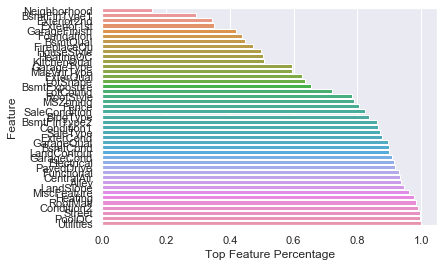

In [233]:
import seaborn as sns

sns.barplot(x='Top Feature Percentage', y ='Feature', data=categorical_percent)
sns.set(rc={'figure.figsize':(12,12)})

In [234]:
drop_cat = list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])

df_copy = df

df_copy= df_copy.drop(drop_cat, axis=1)
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Reg,CollgCr,2Story,7,5,5,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,150,856,Ex,856,854,0,1710,3,1,Gd,8,0,not present,Attchd,5.0,RFn,2,548,0,61,0,0,0,2,2008,208500,706,3.5
2,20,80.0,9600,Reg,Veenker,1Story,6,8,31,31,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,284,1262,Ex,1262,0,0,1262,3,1,TA,6,1,TA,Attchd,31.0,RFn,2,460,298,0,0,0,0,5,2007,181500,978,2.5
3,60,68.0,11250,IR1,CollgCr,2Story,7,5,7,6,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,434,920,Ex,920,866,0,1786,3,1,Gd,6,1,TA,Attchd,7.0,RFn,2,608,0,42,0,0,0,9,2008,223500,486,3.5
4,70,60.0,9550,IR1,Crawfor,2Story,7,5,91,36,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,540,756,Gd,961,756,0,1717,3,1,Gd,7,1,Gd,Detchd,8.0,Unf,3,642,0,35,272,0,0,2,2006,140000,216,2.0
5,60,84.0,14260,IR1,NoRidge,2Story,8,5,8,8,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,490,1145,Ex,1145,1053,0,2198,4,1,Gd,9,1,TA,Attchd,8.0,RFn,3,836,192,84,0,0,0,12,2008,250000,655,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Reg,Gilbert,2Story,6,5,8,7,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,953,953,Ex,953,694,0,1647,3,1,TA,7,1,TA,Attchd,8.0,RFn,2,460,0,40,0,0,0,8,2007,175000,0,2.5
1457,20,85.0,13175,Reg,NWAmes,1Story,6,6,32,22,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,589,1542,TA,2073,0,0,2073,3,1,TA,7,2,TA,Attchd,32.0,Unf,2,500,349,0,0,0,0,2,2010,210000,953,3.0
1458,70,66.0,9042,Reg,Crawfor,2Story,7,9,69,4,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,877,1152,Ex,1188,1152,0,2340,4,1,Gd,9,2,Gd,Attchd,69.0,RFn,1,252,0,60,0,0,2500,5,2010,266500,275,2.0


### Checking Dominant Discrete Features

In [235]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features+['Id']]

discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'TotalBath']

In [236]:
for feature in discrete_features:
    print(df[feature].value_counts())

20     529
60     293
50     144
120     86
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
5     396
6     372
7     314
8     167
4     116
9      42
3      20
10     13
2       3
1       2
Name: OverallQual, dtype: int64
5    808
6    251
7    205
8     72
4     57
3     24
9     22
2      5
1      1
Name: OverallCond, dtype: int64
0      1419
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
3    797
2    354
4    210
1     49
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
1    1378
2      64
3       2
0       1
Name: KitchenAbvGr, dtype: int64
6     401
7     325
5     274
8     185
4      96
9      74


In [237]:
ls=[]
for feature in discrete_features:
    x = list(df[feature].value_counts())[0]/len(df)
    ls.append(x)
   
discrete_percent = pd.DataFrame(list(zip(discrete_features,ls)))
discrete_percent.columns= ['Feature', 'Top Feature Percentage']
discrete_percent = discrete_percent.sort_values('Top Feature Percentage')
discrete_percent

,Feature,Top Feature Percentage
11,MoSold,0.174394
1,OverallQual,0.274048
6,TotRmsAbvGrd,0.277509
12,TotalBath,0.314879
0,MSSubClass,0.366090
7,Fireplaces,0.474048
4,BedroomAbvGr,0.551557
2,OverallCond,0.559170
8,GarageCars,0.563322
5,KitchenAbvGr,0.953633


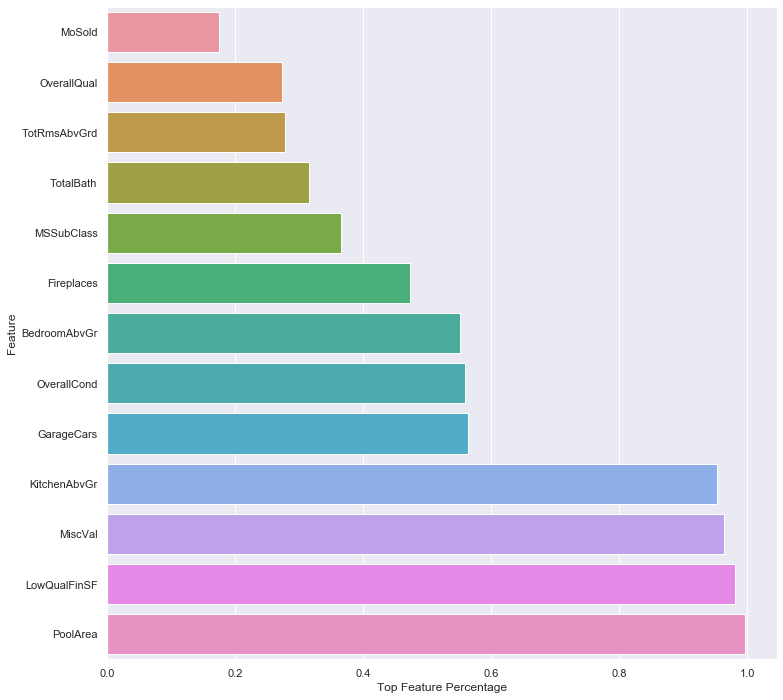

In [238]:
sns.barplot(x='Top Feature Percentage', y ='Feature', data=discrete_percent)
sns.set(rc={'figure.figsize':(6,6)})

In [239]:
#filtering out discrete variables that have one feature accounting for over 70% percent of observations

drop_discrete = list(discrete_percent[discrete_percent['Top Feature Percentage']>.7]['Feature'])

In [240]:
df_copy = df_copy.drop(drop_discrete, axis=1)

In [241]:
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Reg,CollgCr,2Story,7,5,5,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,150,856,Ex,856,854,1710,3,Gd,8,0,not present,Attchd,5.0,RFn,2,548,0,61,0,2,2008,208500,706,3.5
2,20,80.0,9600,Reg,Veenker,1Story,6,8,31,31,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,284,1262,Ex,1262,0,1262,3,TA,6,1,TA,Attchd,31.0,RFn,2,460,298,0,0,5,2007,181500,978,2.5
3,60,68.0,11250,IR1,CollgCr,2Story,7,5,7,6,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,434,920,Ex,920,866,1786,3,Gd,6,1,TA,Attchd,7.0,RFn,2,608,0,42,0,9,2008,223500,486,3.5
4,70,60.0,9550,IR1,Crawfor,2Story,7,5,91,36,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,540,756,Gd,961,756,1717,3,Gd,7,1,Gd,Detchd,8.0,Unf,3,642,0,35,272,2,2006,140000,216,2.0
5,60,84.0,14260,IR1,NoRidge,2Story,8,5,8,8,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,490,1145,Ex,1145,1053,2198,4,Gd,9,1,TA,Attchd,8.0,RFn,3,836,192,84,0,12,2008,250000,655,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Reg,Gilbert,2Story,6,5,8,7,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,953,953,Ex,953,694,1647,3,TA,7,1,TA,Attchd,8.0,RFn,2,460,0,40,0,8,2007,175000,0,2.5
1457,20,85.0,13175,Reg,NWAmes,1Story,6,6,32,22,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,589,1542,TA,2073,0,2073,3,TA,7,2,TA,Attchd,32.0,Unf,2,500,349,0,0,2,2010,210000,953,3.0
1458,70,66.0,9042,Reg,Crawfor,2Story,7,9,69,4,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,877,1152,Ex,1188,1152,2340,4,Gd,9,2,Gd,Attchd,69.0,RFn,1,252,0,60,0,5,2010,266500,275,2.0


### Removing Variables with Multicolinearity

#### Removing Features that are not correlated to Sale Price

In [242]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]


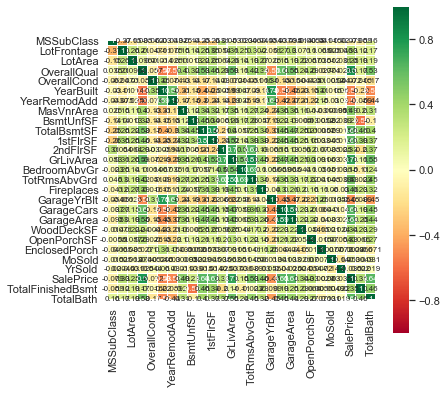

In [243]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [244]:
#low_salecorr_drop = list(golden_corr[abs(golden_corr['SalePrice'])<.2]['SalePrice'].index)
low_salecorr_drop=['MSSubClass','OverallCond','BedroomAbvGr','EnclosedPorch','MoSold','YrSold']
df_copy = df_copy.drop(low_salecorr_drop, axis =1)


In [245]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,Reg,CollgCr,2Story,7,5,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,150,856,Ex,856,854,1710,Gd,8,0,not present,Attchd,5.0,RFn,2,548,0,61,208500,706,3.5
2,80.0,9600,Reg,Veenker,1Story,6,31,31,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,284,1262,Ex,1262,0,1262,TA,6,1,TA,Attchd,31.0,RFn,2,460,298,0,181500,978,2.5
3,68.0,11250,IR1,CollgCr,2Story,7,7,6,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,434,920,Ex,920,866,1786,Gd,6,1,TA,Attchd,7.0,RFn,2,608,0,42,223500,486,3.5
4,60.0,9550,IR1,Crawfor,2Story,7,91,36,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,540,756,Gd,961,756,1717,Gd,7,1,Gd,Detchd,8.0,Unf,3,642,0,35,140000,216,2.0
5,84.0,14260,IR1,NoRidge,2Story,8,8,8,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,490,1145,Ex,1145,1053,2198,Gd,9,1,TA,Attchd,8.0,RFn,3,836,192,84,250000,655,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,Reg,Gilbert,2Story,6,8,7,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,953,953,Ex,953,694,1647,TA,7,1,TA,Attchd,8.0,RFn,2,460,0,40,175000,0,2.5
1457,85.0,13175,Reg,NWAmes,1Story,6,32,22,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,589,1542,TA,2073,0,2073,TA,7,2,TA,Attchd,32.0,Unf,2,500,349,0,210000,953,3.0
1458,66.0,9042,Reg,Crawfor,2Story,7,69,4,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,877,1152,Ex,1188,1152,2340,Gd,9,2,Gd,Attchd,69.0,RFn,1,252,0,60,266500,275,2.0


In [246]:
low_salecorr_drop

['MSSubClass',
 'OverallCond',
 'BedroomAbvGr',
 'EnclosedPorch',
 'MoSold',
 'YrSold']

#### Removing Features that are highly correlated to one another

In [247]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]

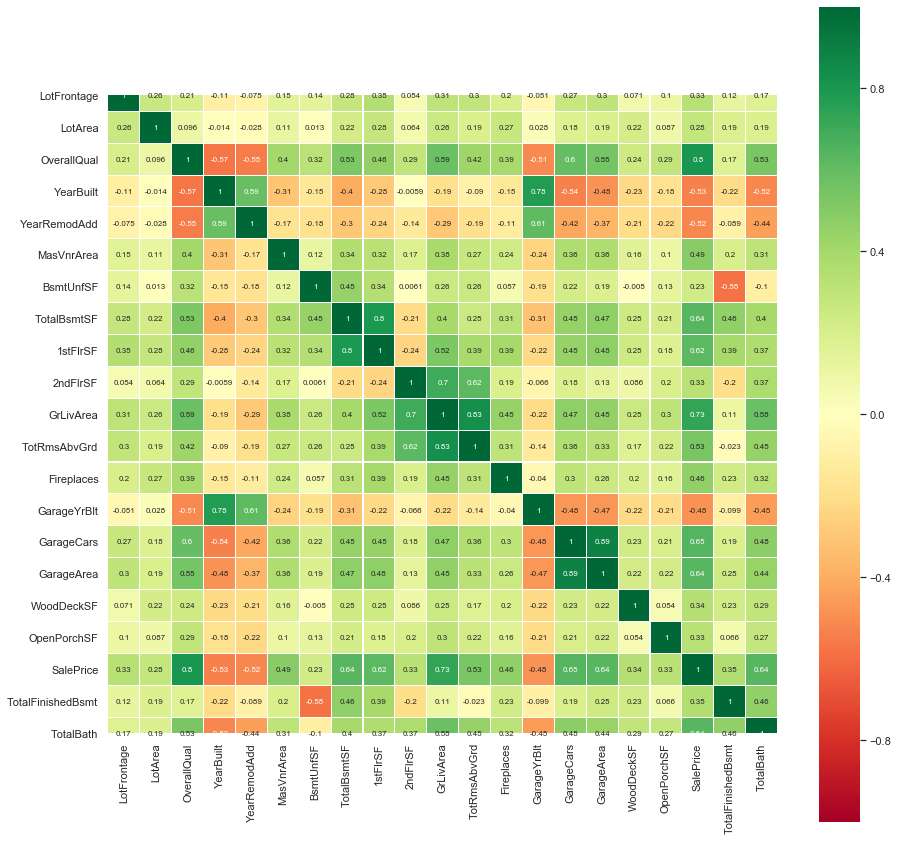

In [248]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [249]:
#Calulating VIF to test if there is multicolinearity

In [250]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [251]:
test = calc_vif(df_copy[numerical_features_copy])
test[test['VIF']<10]
test

,variables,VIF
0,LotFrontage,14.724400
1,LotArea,3.208869
2,OverallQual,41.081054
3,YearBuilt,8.483891
4,YearRemodAdd,4.208119
5,MasVnrArea,1.830317
6,BsmtUnfSF,inf
7,TotalBsmtSF,inf
8,1stFlrSF,715.454644
9,2ndFlrSF,146.428469


In [253]:
df_copy['LotArea'].describe()

count      1445.000000
mean      10300.090657
std        8281.580805
min        1300.000000
25%        7500.000000
50%        9452.000000
75%       11526.000000
max      164660.000000
Name: LotArea, dtype: float64

### Box Cox Transformation for Continuous Numercial Features

In [195]:
from scipy import stats
i = [feature for feature in continuous_features if (feature in df_copy.columns) and (feature != 'SalePrice')]
test = df_copy.copy()
test[i]

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,TotalFinishedBsmt
Id,,,,,,,,,,,,
1,65.0,8450,196.0,150,856,856,854,1710,548,0,61,706
2,80.0,9600,0.0,284,1262,1262,0,1262,460,298,0,978
3,68.0,11250,162.0,434,920,920,866,1786,608,0,42,486
4,60.0,9550,0.0,540,756,961,756,1717,642,0,35,216
5,84.0,14260,350.0,490,1145,1145,1053,2198,836,192,84,655
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,0.0,953,953,953,694,1647,460,0,40,0
1457,85.0,13175,119.0,589,1542,2073,0,2073,500,349,0,953
1458,66.0,9042,0.0,877,1152,1188,1152,2340,252,0,60,275


In [196]:
for f in i:
    transformed, lam = (stats.boxcox(test[f]+1))
    test[f]=transformed
    print(lam)
    
#pd.DataFrame(transformed)
df_copy = test

0.5252183097803825
0.08535789215442165
-0.2414941744101274
0.4709822806972006
0.8183162873432392
0.02293986760371175
-0.12811877648382855
0.08866691316812471
0.8155754504419407
-0.07710305486277903
0.008798063038343512
0.24603920090562464


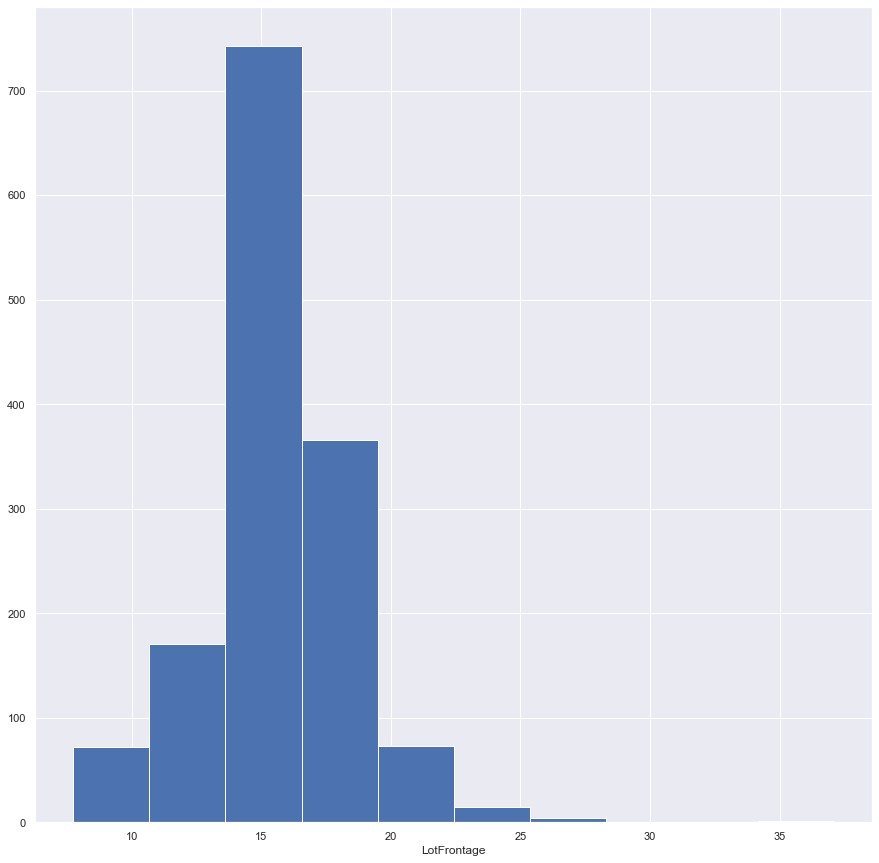

<Figure size 360x360 with 0 Axes>

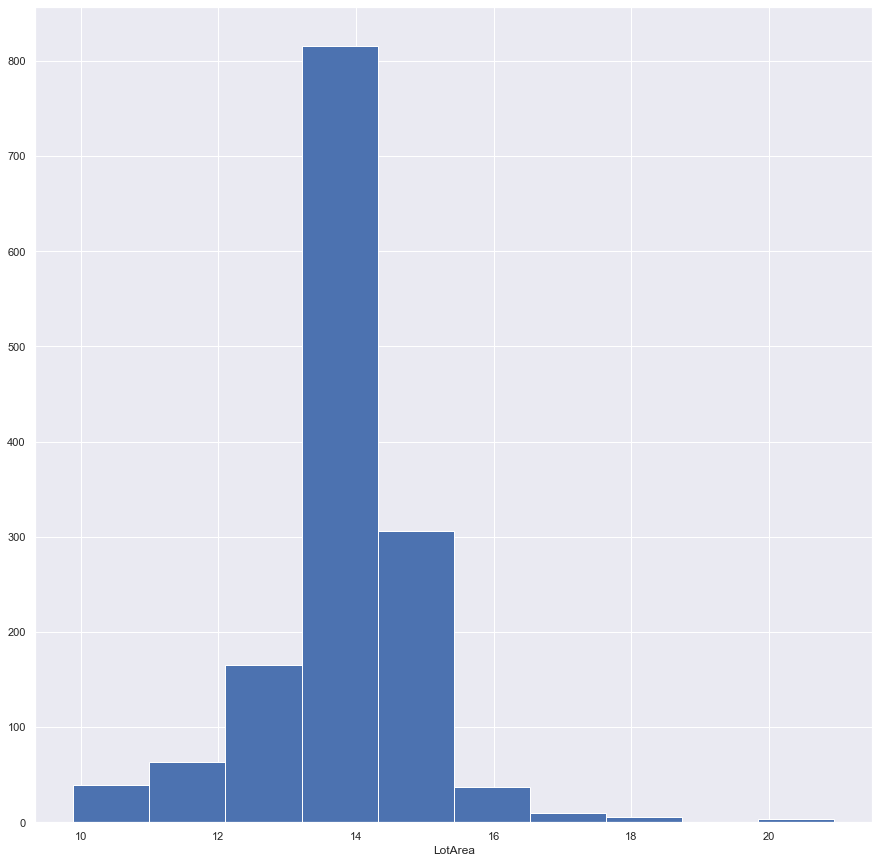

<Figure size 360x360 with 0 Axes>

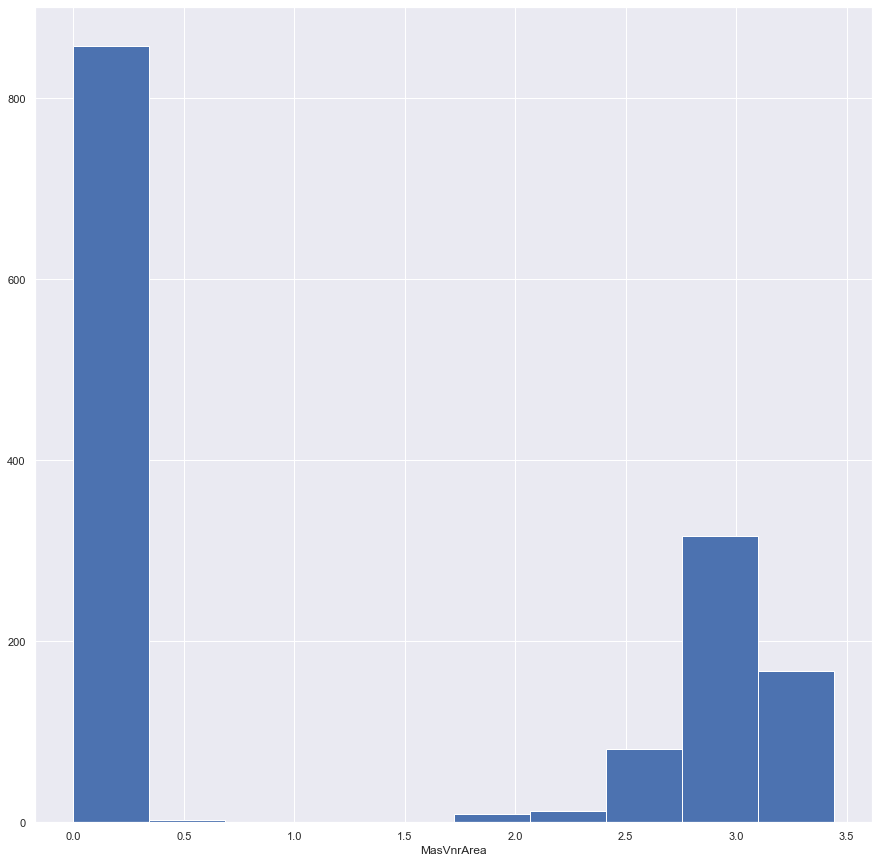

<Figure size 360x360 with 0 Axes>

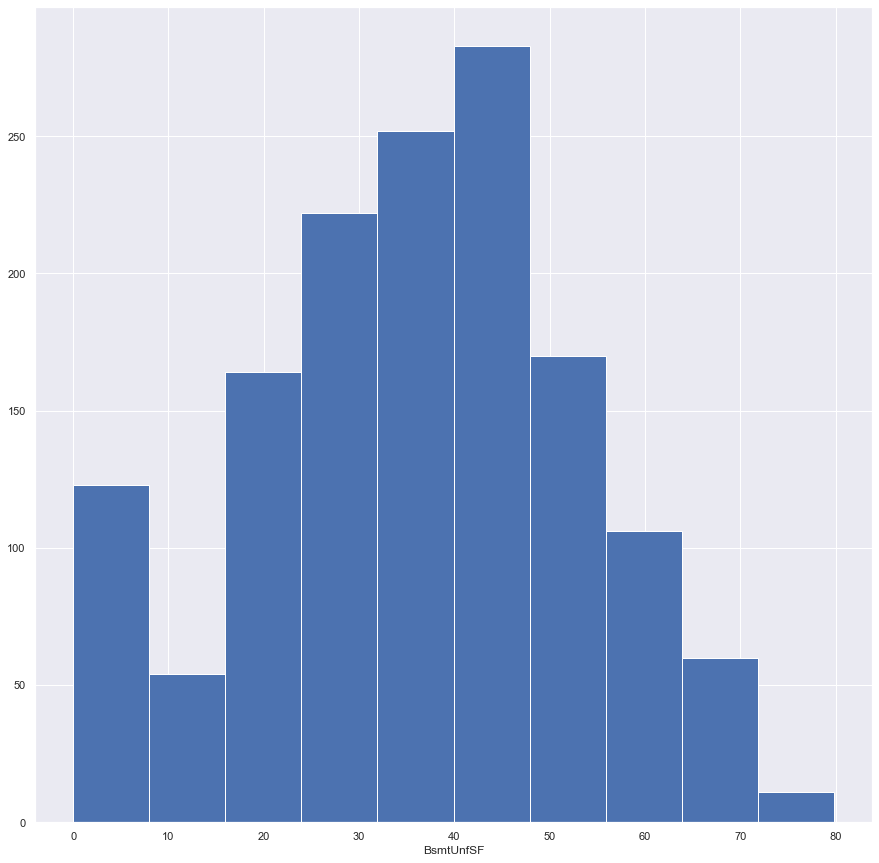

<Figure size 360x360 with 0 Axes>

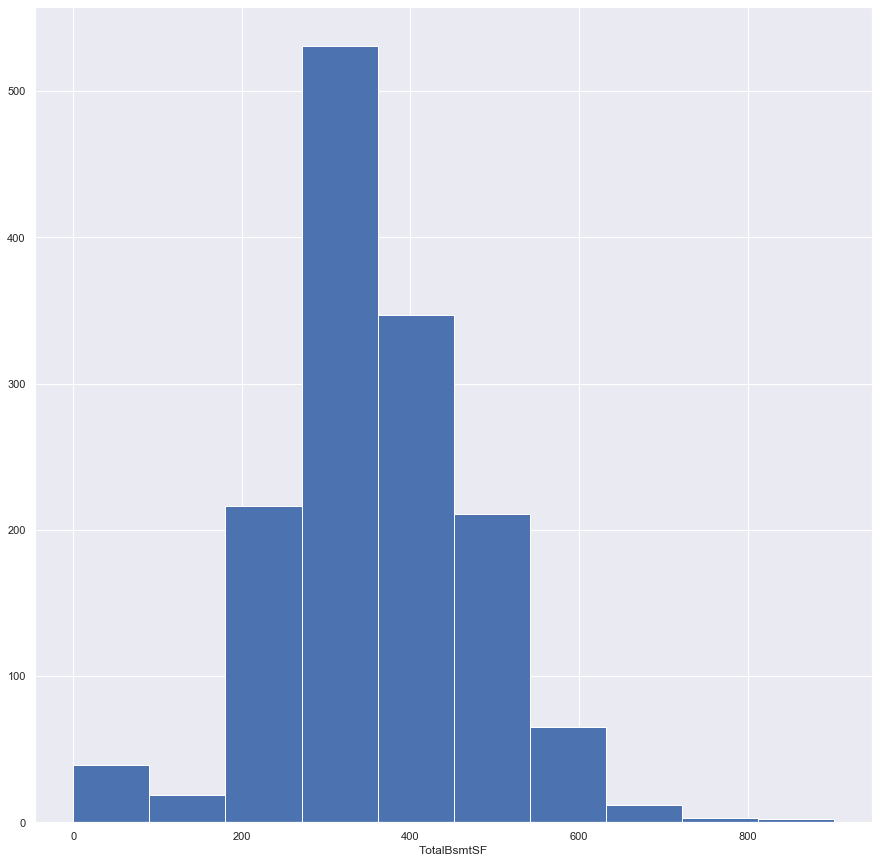

<Figure size 360x360 with 0 Axes>

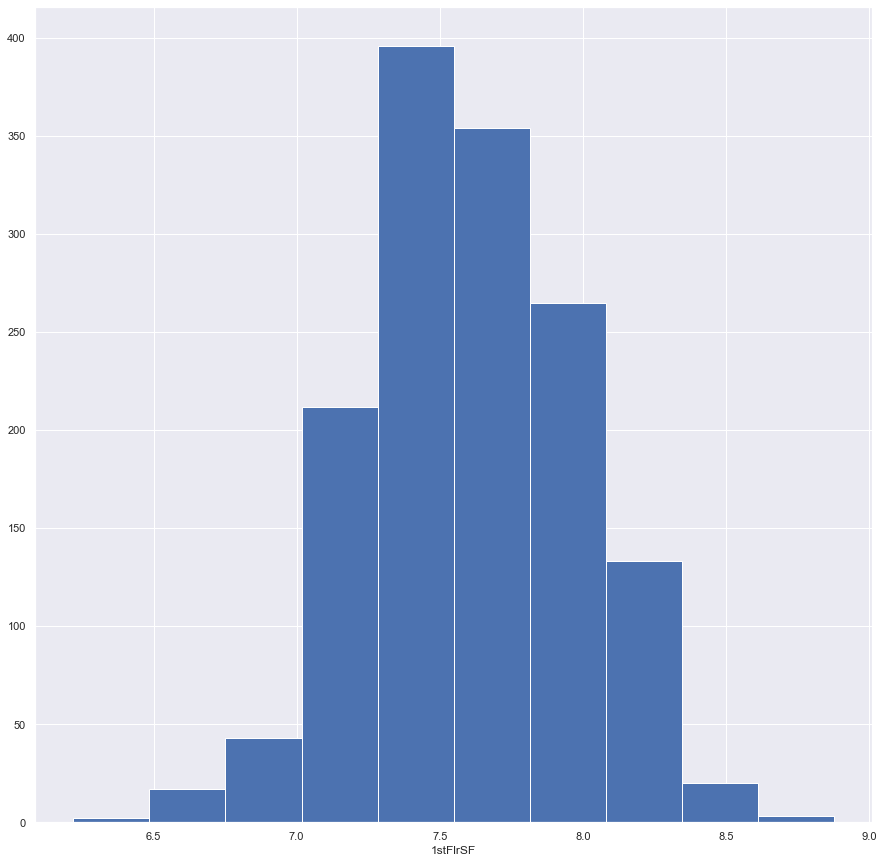

<Figure size 360x360 with 0 Axes>

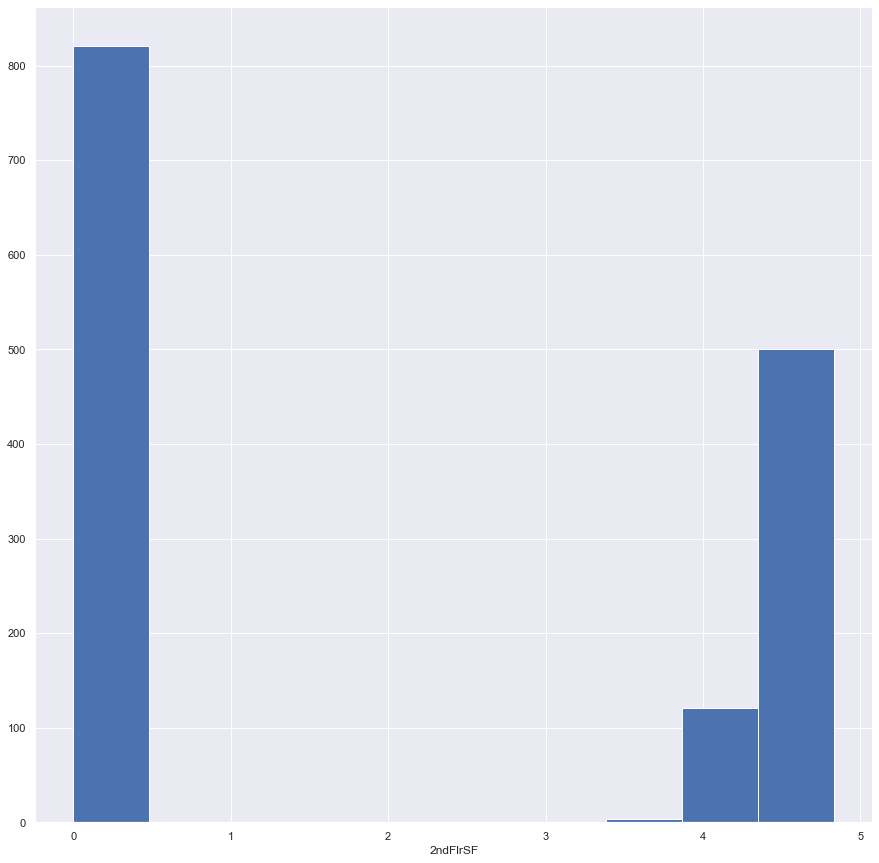

<Figure size 360x360 with 0 Axes>

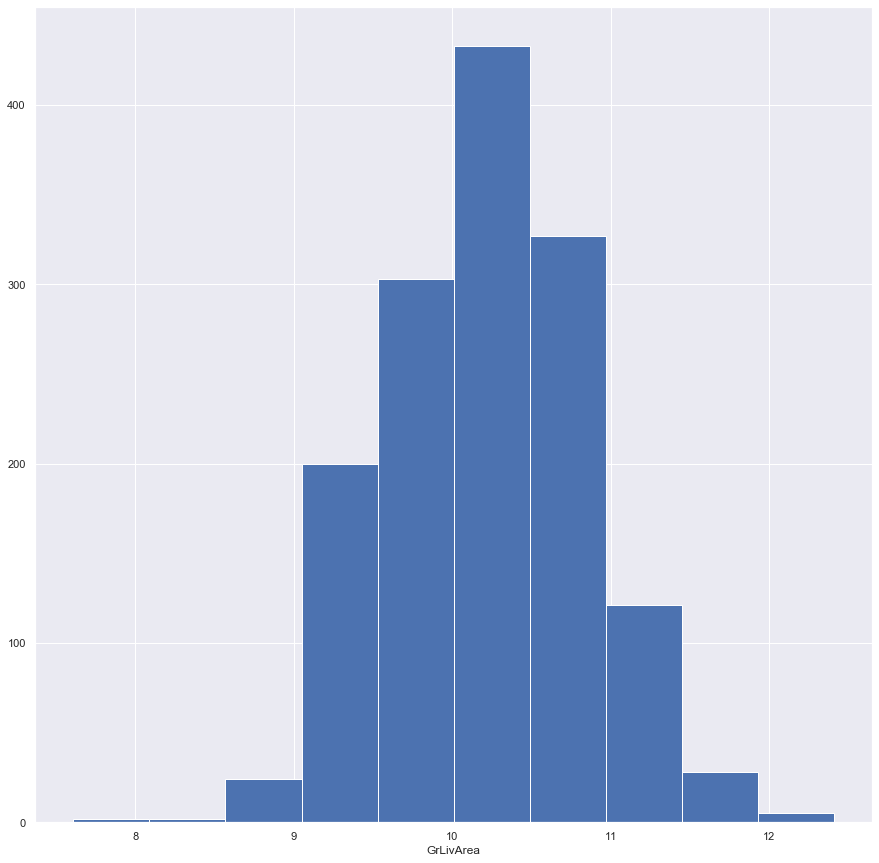

<Figure size 360x360 with 0 Axes>

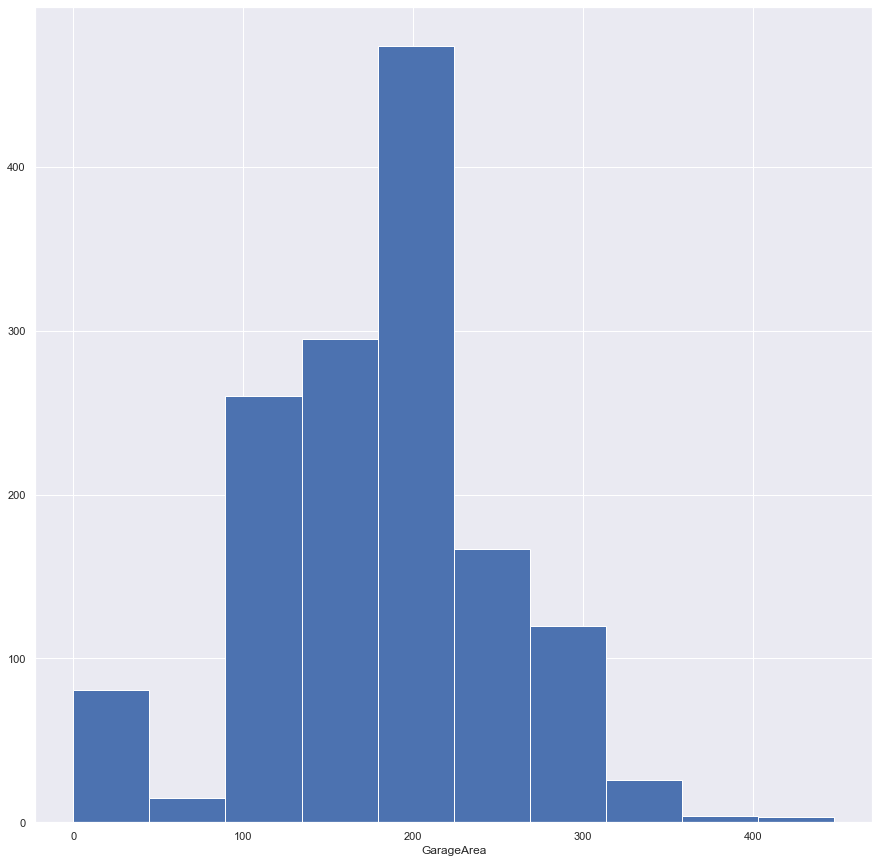

<Figure size 360x360 with 0 Axes>

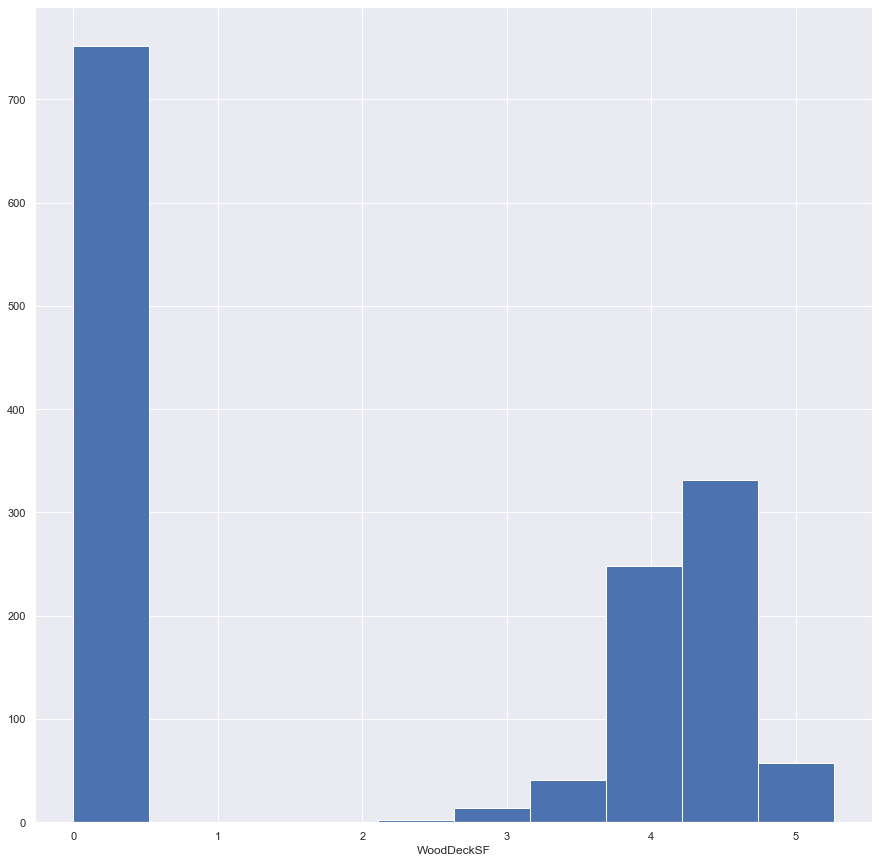

<Figure size 360x360 with 0 Axes>

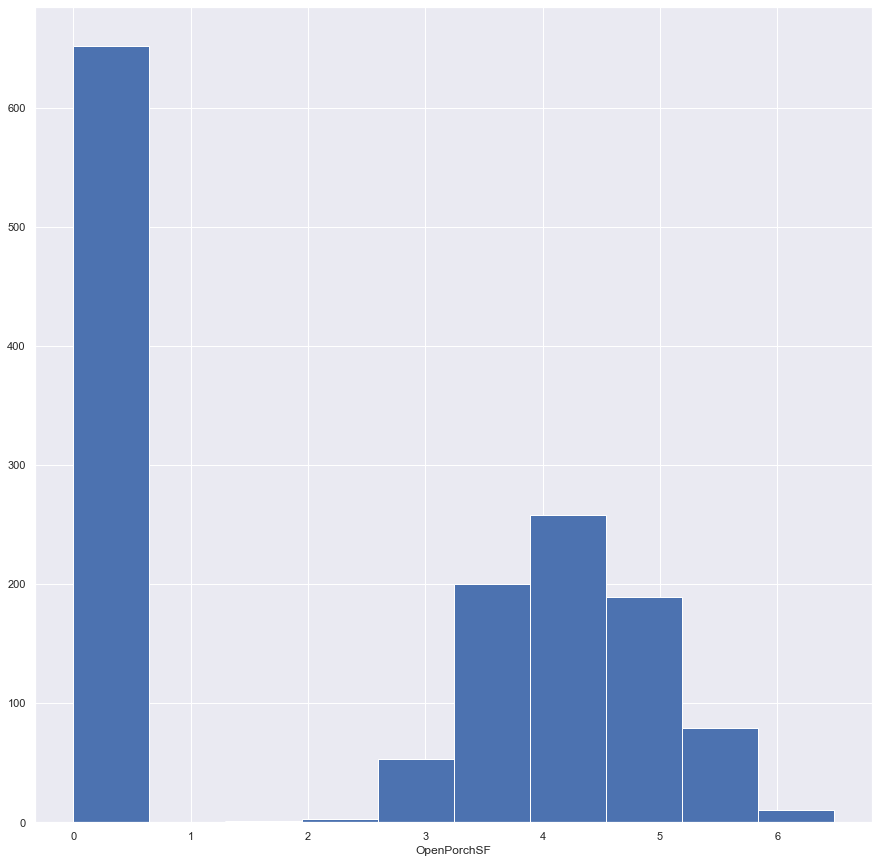

<Figure size 360x360 with 0 Axes>

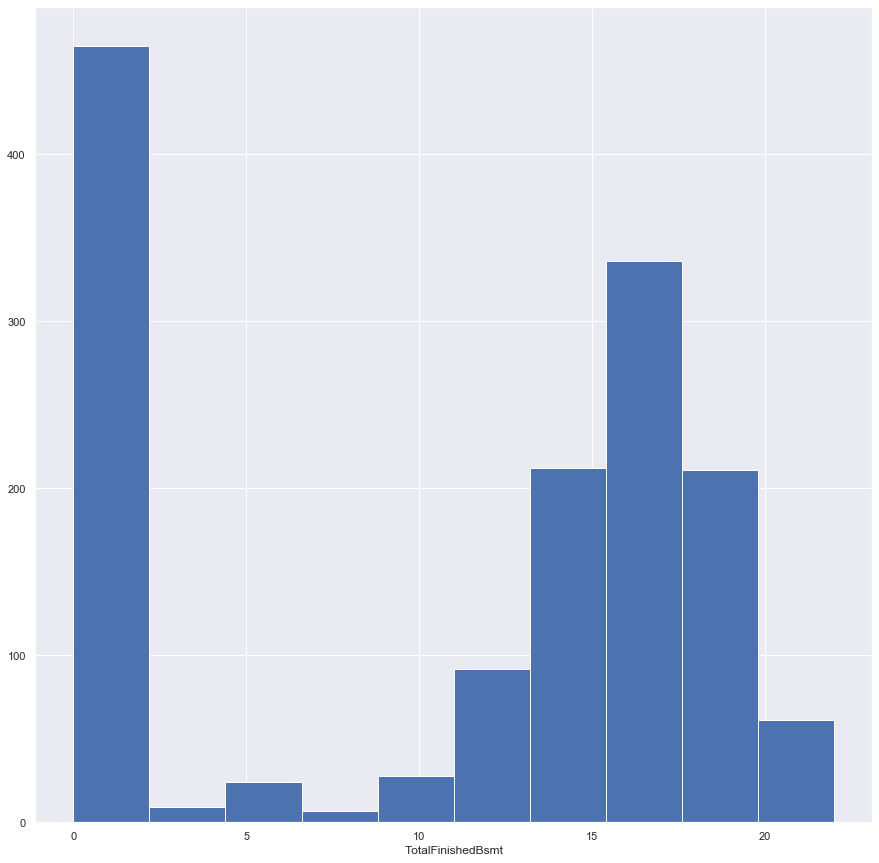

<Figure size 360x360 with 0 Axes>

In [128]:
for feature in i:
    data=test.copy()
    plt.hist(data[feature])
    plt.xlabel(feature)
    plt.figure(figsize=[5,5])
    plt.show()

In [129]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15.287695,13.632926,Reg,CollgCr,2Story,7,5,5,VinylSd,VinylSd,BrkFace,2.984793,Gd,PConc,Gd,No,GLQ,20.432408,305.810785,Ex,7.304664,4.518654,10.545150,Gd,8,0,not present,Attchd,5.0,RFn,2,209.085751,0.000000,4.202979,208500,16.356022,3.5
2,17.239974,13.910482,Reg,Veenker,1Story,6,31,31,MetalSd,MetalSd,None,0.000000,TA,CBlock,Gd,Gd,ALQ,28.298505,420.481939,Ex,7.759475,0.000000,9.965541,TA,6,1,TA,Attchd,31.0,RFn,2,181.157116,4.612728,0.000000,181500,18.058681,2.5
3,15.693788,14.259735,IR1,CollgCr,2Story,7,7,6,VinylSd,VinylSd,BrkFace,2.930671,Gd,PConc,Gd,Mn,GLQ,35.002689,324.450218,Ex,7.388824,4.524517,10.629408,Gd,6,1,TA,Attchd,7.0,RFn,2,227.650453,0.000000,3.824124,223500,14.566479,3.5
4,14.590868,13.899064,IR1,Crawfor,2Story,7,91,36,Wd Sdng,Wd Shng,None,0.000000,TA,BrkTil,TA,No,ALQ,39.018542,276.167375,Gd,7.439786,4.466991,10.553052,Gd,7,1,Gd,Detchd,8.0,Unf,3,238.019376,0.000000,3.640608,140000,11.206217,2.0
5,17.730821,14.790720,IR1,NoRidge,2Story,8,8,8,VinylSd,VinylSd,BrkFace,3.135307,Gd,PConc,Gd,Av,GLQ,37.181717,388.234879,Ex,7.645087,4.605592,11.036133,Gd,9,1,TA,Attchd,8.0,RFn,3,295.420207,4.325850,4.530618,250000,15.983303,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,14.872738,13.492362,Reg,Gilbert,2Story,6,8,7,VinylSd,VinylSd,None,0.000000,TA,PConc,Gd,No,Unf,51.618295,333.968531,Ex,7.430011,4.430243,10.472678,TA,7,1,TA,Attchd,8.0,RFn,2,181.157116,0.000000,3.774904,175000,0.000000,2.5
1457,17.851808,14.612288,Reg,NWAmes,1Story,6,32,22,Plywood,Plywood,Stone,2.837770,TA,CBlock,Gd,No,ALQ,40.733370,495.565378,TA,8.347088,0.000000,10.920641,TA,7,2,TA,Attchd,32.0,Unf,2,193.963719,4.713592,0.000000,210000,17.918325,3.0
1458,15.424015,13.779845,Reg,Crawfor,2Story,7,69,4,CemntBd,CmentBd,None,0.000000,Ex,Stone,TA,No,GLQ,49.557574,390.180479,Ex,7.688400,4.642183,11.160285,Gd,9,2,Gd,Attchd,69.0,RFn,1,110.579060,0.000000,4.186119,266500,12.137099,2.0


In [138]:
x = [df_copy[feature].mean() for feature in i]
list(zip(i, x))

[('LotFrontage', 15.701464081419244),
 ('LotArea', 13.792353388712376),
 ('MasVnrArea', 1.1955830895234358),
 ('BsmtUnfSF', 35.833495594683605),
 ('TotalBsmtSF', 356.0727219882492),
 ('1stFlrSF', 7.599376345081912),
 ('2ndFlrSF', 1.9264423473015806),
 ('GrLivArea', 10.207237919410836),
 ('GarageArea', 180.93681916400294),
 ('WoodDeckSF', 2.028088076840037),
 ('OpenPorchSF', 2.3401902438289146),
 ('TotalFinishedBsmt', 10.633150083354012)]

### Dummifying Categorical Variables

In [61]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [62]:
temp = pd.get_dummies(df_copy, drop_first=True)

In [63]:
#dummified version of the dataframe
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TotalFinishedBsmt,TotalBath,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_not present,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_not present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_not present,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_not present,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15.287695,13.632926,7,5,5,2.984793,20.432408,305.810785,7.304664,4.518654,10.545150,8,0,5.0,2,209.085751,0.000000,4.202979,208500,16.356022,3.5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
2,17.239974,13.910482,6,31,31,0.000000,28.298505,420.481939,7.759475,0.000000,9.965541,6,1,31.0,2,181.157116,4.612728,0.000000,181500,18.058681,2.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,15.693788,14.259735,7,7,6,2.930671,35.002689,324.450218,7.388824,4.524517,10.629408,6,1,7.0,2,227.650453,0.000000,3.824124,223500,14.566479,3.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,14.590868,13.899064,7,91,36,0.000000,39.018542,276.167375,7.439786,4.466991,10.553052,7,1,8.0,3,238.019376,0.000000,3.640608,140000,11.206217,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,17.730821,14.790720,8,8,8,3.135307,37.181717,388.234879,7.645087,4.605592,11.036133,9,1,8.0,3,295.420207,4.325850,4.530618,250000,15.983303,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Dropping Irrelavent Neighborhoods

In [64]:
#hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values().index)
#top_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[-3:].index)
#bottom_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[:3].index)

#keep_hoods = top_hoods + bottom_hoods
#drop_hoods = ['Neighborhood_'+h for h in hoods if h not in keep_hoods]

drop_hoods=['Neighborhood_OldTown',
 'Neighborhood_Edwards',
 'Neighborhood_BrkSide',
 'Neighborhood_Sawyer',
 'Neighborhood_Blueste',
 'Neighborhood_SWISU',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_Mitchel',
 'Neighborhood_SawyerW',
 'Neighborhood_Gilbert',
 'Neighborhood_NWAmes',
 'Neighborhood_Blmngtn',
 'Neighborhood_CollgCr',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Veenker',
 'Neighborhood_Somerst',
 'Neighborhood_Timber']
feat =[feature for feature in temp.columns if feature not in drop_hoods]
temp = temp[feat]
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TotalFinishedBsmt,TotalBath,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_BrDale,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_not present,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_not present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_not present,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_not present,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15.287695,13.632926,7,5,5,2.984793,20.432408,305.810785,7.304664,4.518654,10.545150,8,0,5.0,2,209.085751,0.000000,4.202979,208500,16.356022,3.5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
2,17.239974,13.910482,6,31,31,0.000000,28.298505,420.481939,7.759475,0.000000,9.965541,6,1,31.0,2,181.157116,4.612728,0.000000,181500,18.058681,2.5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,15.693788,14.259735,7,7,6,2.930671,35.002689,324.450218,7.388824,4.524517,10.629408,6,1,7.0,2,227.650453,0.000000,3.824124,223500,14.566479,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,14.590868,13.899064,7,91,36,0.000000,39.018542,276.167375,7.439786,4.466991,10.553052,7,1,8.0,3,238.019376,0.000000,3.640608,140000,11.206217,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,17.730821,14.790720,8,8,8,3.135307,37.181717,388.234879,7.645087,4.605592,11.036133,9,1,8.0,3,295.420207,4.325850,4.530618,250000,15.983303,3.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
#temp.to_csv('to_test.csv')

### Lasso Model

In [ ]:
X = temp.drop('SalePrice', axis=1)
y= temp['SalePrice']


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [ ]:
#do grid search to deterimine alpha

from sklearn.linear_model import Lasso
alpha_norm = 10

lasso = Lasso(normalize = True, alpha = alpha_norm)
lasso.fit(Xtrain, ytrain)


In [ ]:
lasso.score(Xtest, ytest)



In [ ]:
print(lasso.coef_)
print(lasso.intercept_)

In [ ]:
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] == 0:
        print(i)

In [ ]:
temp.iloc[:,112]